In [ ]:
# Used to create project structure  
# !pip install cookiecutter
# !cookiecutter https://github.com/drivendata/cookiecutter-data-science

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import yaml

with open('../src/CONFIG.yaml', 'r') as file:
    yaml_content = yaml.safe_load(file)
    filepath = yaml_content['filepaths']
input_filepath = filepath['input_filepath']
processed_filepath = filepath['processed_filepath']
encoded_filepath = filepath['encoded_filepath']
# Access the lists in the dictionary
cat_vars = yaml_content['cat_vars']
num_vars = yaml_content['num_vars']
features = yaml_content['features']





# EDA


In [3]:
data = pd.read_csv('../' + input_filepath)
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
data[num_vars  + ["Weekly_Sales"]].describe()

,Size,CPI,Unemployment,MarkDown1,MarkDown5,Weekly_Sales
count,137991.000000,137991.000000,137990.000000,49320.000000,49320.000000,137991.000000
mean,149063.943989,187.566431,7.603765,8127.484987,5122.983299,18811.313135
std,61269.553530,39.499884,1.889095,8627.341252,5344.725276,26596.725987
min,34875.000000,126.064000,3.879000,35.940000,135.160000,-1098.000000
25%,112238.000000,130.829533,6.425000,3093.390000,2314.580000,2732.245000
50%,155078.000000,211.894272,7.346000,6086.210000,3915.850000,8787.870000
75%,202505.000000,218.642470,8.257000,10192.490000,6147.500000,23474.870000
max,219622.000000,227.232807,14.313000,78124.500000,58068.140000,693099.360000


It is seen that MarkDown has a lot of missing vaues. This will need to be handled, mostly by imputing with zeros. 
Unemployment has 1 missing value, which could also be imputed by mean. 
Sales are negative, so I will analyze what % is negative

In [4]:
# percent of negative weekly sales
print('Percent of -ve weekly sales:', len(data[data["Weekly_Sales"] < 0]) / len(data))

Percent of -ve weekly sales: 0.002318991818306991


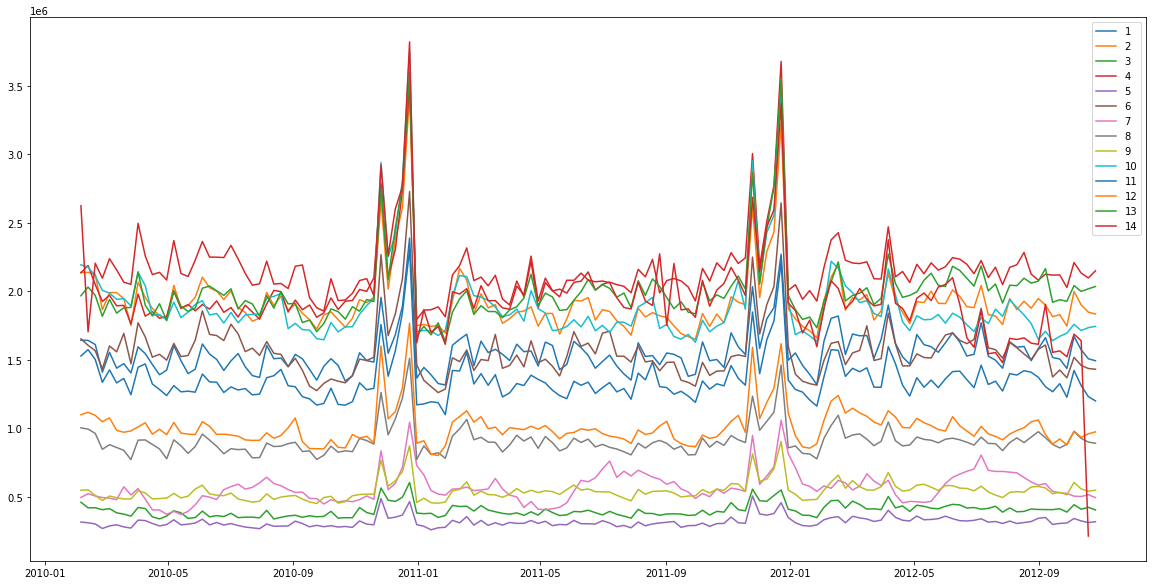

In [9]:
#set size of plot
plt.figure(figsize=(20, 10))
data_per_store  = data.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
# name columns in data_per_store
data_per_store.columns = ['Store','Date','Weekly_Sales']
for store in data_per_store['Store'].unique():
    temp = data_per_store[data_per_store['Store']==store]
    plt.plot(temp['Date'], temp['Weekly_Sales'])

plt.legend(data_per_store['Store'].unique())
plt.x_label = 'Date'
plt.y_label = 'Weekly Sales'
plt.show()


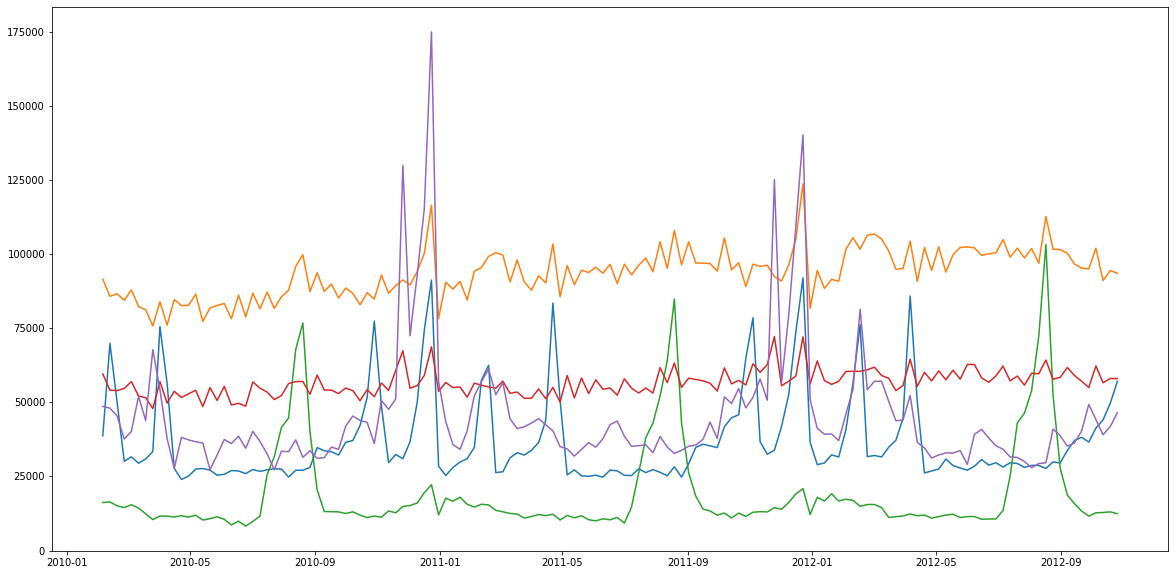

In [17]:
data_per_dept  = data[data['Store'] == 4].groupby(['Dept','Date'])['Weekly_Sales'].sum().reset_index()
# name columns in data_per_store
data_per_dept.columns = ['Dept','Date','Weekly_Sales']
plt.figure(figsize=(20, 10))
for dept in data_per_dept['Dept'].unique()[:5]:
    temp = data_per_dept[data_per_dept['Dept']==dept ]
    plt.plot(temp['Date'], temp['Weekly_Sales'])
#label x and y axes
plt.x_label = 'Date'
plt.y_label = 'Weekly Sales'
plt.show()

In [8]:
#scaling data 
data_scaled = pd.read_csv('../' + encoded_filepath)
data_scaled['Date'] = pd.to_datetime(data_scaled['Date'], format="%Y-%m-%d")
data_scaled['min_sales'] = data_scaled.groupby(['Store', 'Dept'])['Weekly_Sales'].\
    transform(lambda x: x.min())
data_scaled['max_sales'] = data_scaled.groupby(['Store', 'Dept'])['Weekly_Sales'].\
    transform(lambda x: x.max())
data_scaled['sales_scaled'] = (data_scaled['Weekly_Sales'] - data_scaled['min_sales'])/(data_scaled['max_sales'] - data_scaled['min_sales'])


Text(0.5, 1.0, 'Box plot for month (seasonality)')

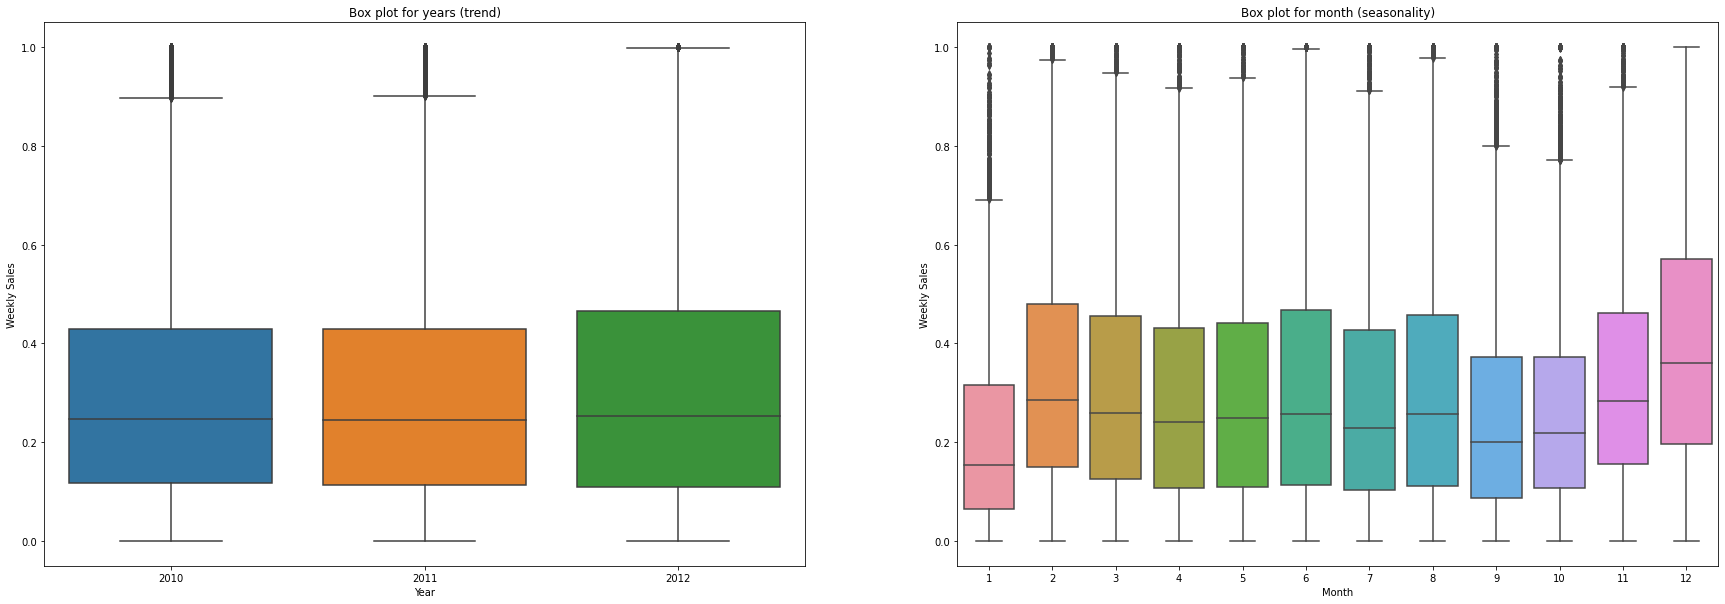

In [14]:
# visualize
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.boxplot(x='Year', y='sales_scaled', data=data_scaled, ax=ax[0]).set(
    xlabel='Year', 
    ylabel='Weekly Sales'
)
ax[0].set_title('Box plot for years (trend)')
sns.boxplot(x='Month', y='sales_scaled', data=data_scaled, ax=ax[1]).set(
    xlabel='Month', 
    ylabel='Weekly Sales'
)
ax[1].set_title('Box plot for month (seasonality)')


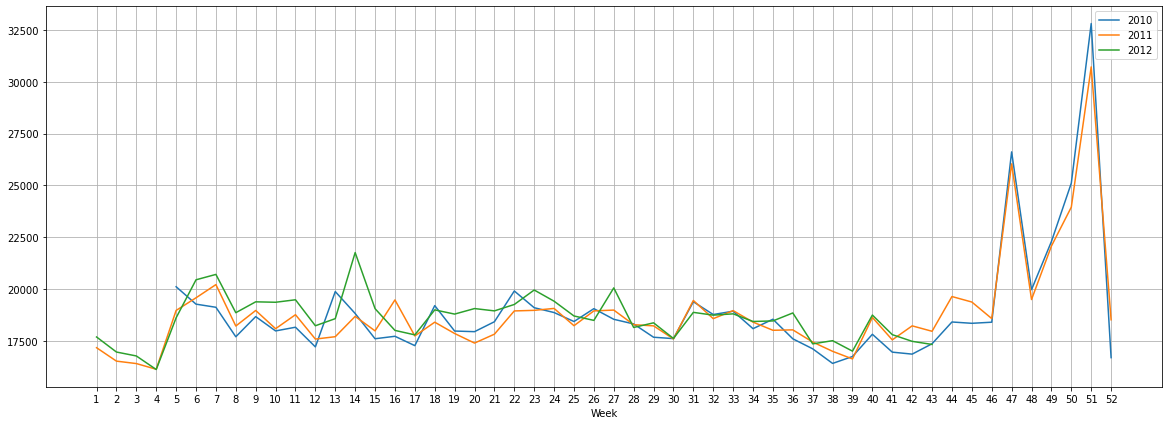

In [15]:
weekly_sales2010 = data_scaled.loc[data_scaled['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = data_scaled.loc[data_scaled['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = data_scaled.loc[data_scaled['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()